### 5 Fases da Pipeline do Processo de Criação de um Modelo ML 

1° Entender o problema de négocio
2° Fazer analise exploratoria dos dados
3° Fazer pré processamento dos dados
4° Contruir Modelo

In [226]:
# import das bibliotecas utilizadas

import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.model_selection import KFold

In [227]:
# Importação da base 

base= pd.read_csv('C:/Users/Usuário/Downloads/archive (1)/segmentation data.csv')

In [228]:
# vendo a base

base.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [229]:
base.info() # vendo infos de numeo de netradas, colunas e vendo tipos de dados que existem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [230]:
base.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [231]:
base.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

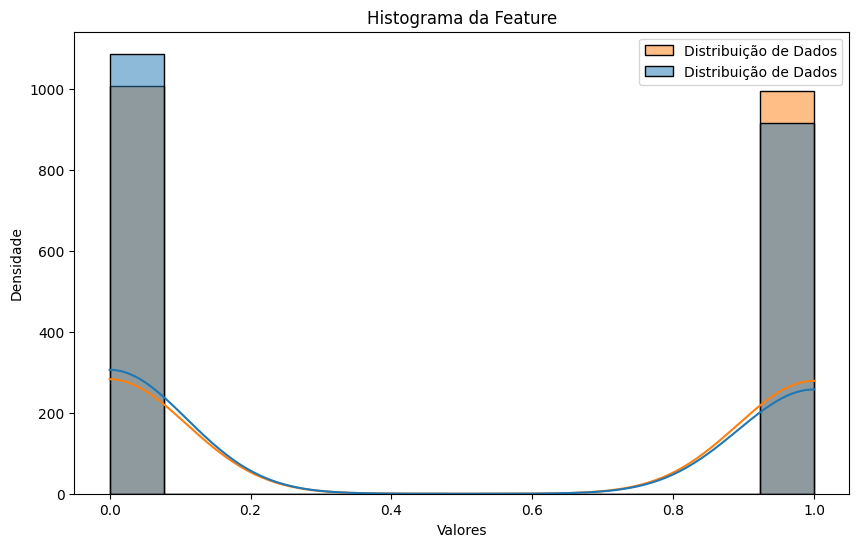

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt



# Configure o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Escolha a feature que você deseja visualizar
feature = ['Sex', 'Marital status']

# Plote um histograma da feature
sns.histplot(base[feature], kde=True, color='blue', label='Distribuição de Dados')

# Adicione título e rótulos aos eixos
plt.title('Histograma da Feature')
plt.xlabel('Valores')
plt.ylabel('Densidade')

# Adicione uma legenda
plt.legend()

# Exiba o gráfico
plt.show()

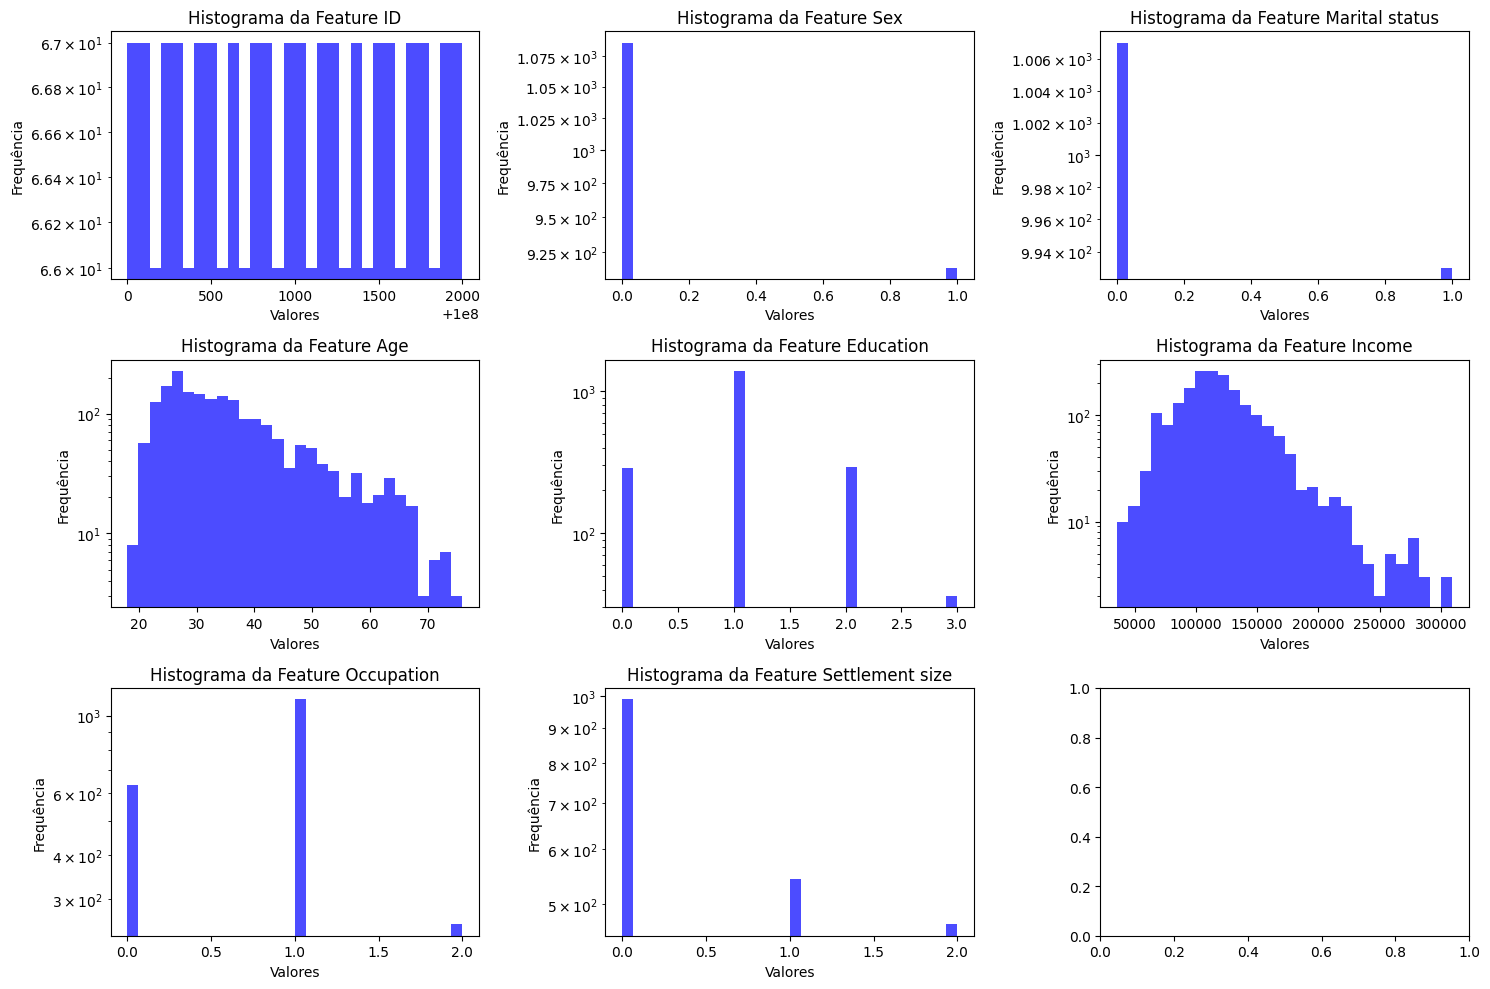

In [233]:
import matplotlib.pyplot as plt

# Suponha que 'df' seja o seu DataFrame contendo seus dados

# Escolha o número de colunas e linhas para os subplots
num_cols = 3  # Número de colunas
num_rows = (len(base.columns) + num_cols - 1) // num_cols  # Número de linhas

# Configure o tamanho dos subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten o array de eixos para facilitar o acesso
axes = axes.flatten()

# Plote um histograma para cada variável
for i, col in enumerate(base.columns):
    ax = axes[i]
    ax.hist(base[col], bins=30, color='blue', alpha=0.7, log=True)
    ax.set_title(f'Histograma da Feature {col}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Frequência')

# Exiba o gráfico
plt.tight_layout()
plt.show()

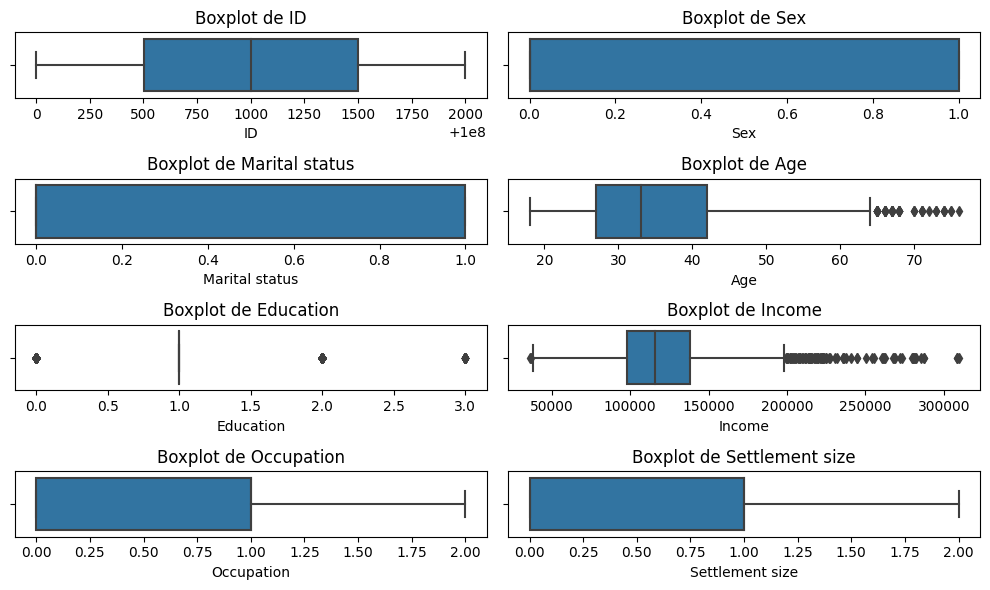

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que 'df' seja o seu DataFrame contendo seus dados

# Calcule o número de linhas e colunas para os subplots
num_cols = 2
num_rows = (len(base.columns) + num_cols - 1) // num_cols

# Configure o tamanho dos subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 6))

# Flatten o array de eixos para facilitar o acesso
axes = axes.flatten()

# Plote um boxplot para cada variável em um subplot separado
for i, col in enumerate(base.columns):
    sns.boxplot(x=base[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

# Ajuste automaticamente o layout
plt.tight_layout()

# Exiba o gráfico
plt.show()

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import pandas as pd



# Divida os dados em conjuntos de treino e teste
X_train, X_test = train_test_split(base, test_size=0.2, random_state=42)

# Instancie o MinMaxScaler
scaler = MinMaxScaler()

# Ajuste o scaler aos dados de treino e transforme os dados de treino
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

 #aplicando o DBSCAN apenas aos dados de treino e não aos dados de teste.

# Instancie o DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=10)

# Ajuste o DBSCAN aos dados de treino
dbscan.fit(X_train_scaled)

# Atribua rótulos de cluster aos dados de treino
labels_train = dbscan.labels_

# Exiba os rótulos de cluster
print("Rótulos de Cluster dos Dados de Treino:")
print(labels_train)

Rótulos de Cluster dos Dados de Treino:
[0 1 0 ... 2 3 2]


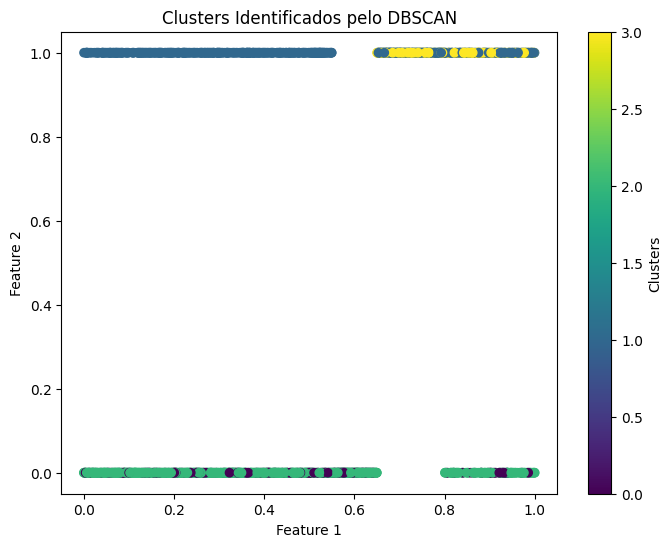

In [236]:
import matplotlib.pyplot as plt

# Configure o tamanho do gráfico
plt.figure(figsize=(8, 6))

# Plote o gráfico de dispersão com cores diferentes para cada cluster
plt.scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 1], c=labels_train, cmap='viridis')

# Adicione título e rótulos aos eixos
plt.title('Clusters Identificados pelo DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Adicione uma legenda
plt.colorbar(label='Clusters')

# Exiba o gráfico
plt.show()

In [237]:
#Se o Silhouette Score for próximo de 1, isso indica que as amostras estão bem agrupadas e estão mais próximas
# do seu próprio cluster do que de clusters vizinhos. Isso sugere uma boa separação entre os clusters.
#Se o Silhouette Score for próximo de 0, isso indica que as amostras estão próximas da fronteira entre
# dois clusters e pode haver sobreposição ou ambiguidade na atribuição de cluster.

from sklearn.metrics import silhouette_score

# Avalie o desempenho do DBSCAN usando a métrica silhouette
silhouette_avg = silhouette_score(X_train_scaled, labels_train)

print("Métrica Silhouette Score:", silhouette_avg)

Métrica Silhouette Score: 0.3540691807795164
